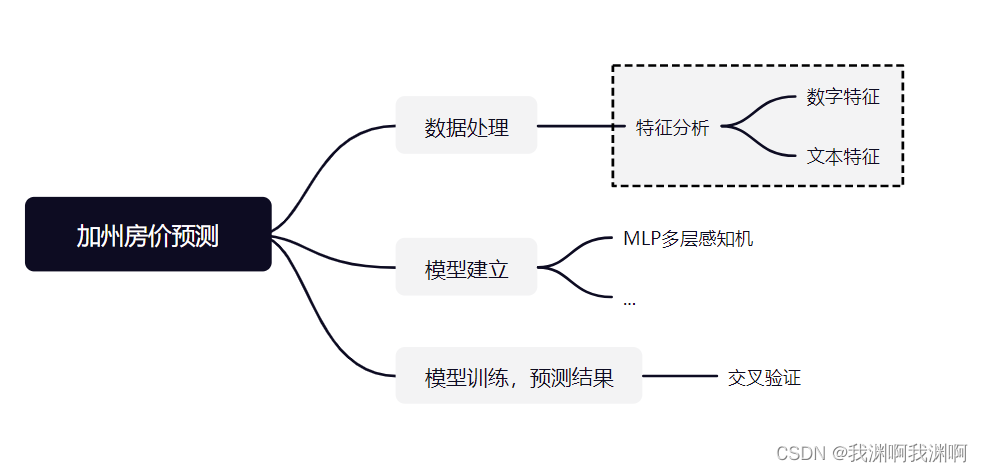

# 数据预处理
思想：按照num和obj分为两类数据，不能直接对obj进行getdummies，否则内存会炸掉

In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print(train_data.shape, test_data.shape)

(47439, 41) (31626, 40)


In [14]:
# 将数据集按照数字和非数字(字符串、文字等)进行划分
num_features = train_data.dtypes[train_data.dtypes != 'object'].index
obj_features = train_data.dtypes[train_data.dtypes == 'object'].index

train_num = train_data[numeric_features]
train_obj = train_data[object_features]
 

## 对数字特征的处理
相关性分析：皮尔森相关性分析 和 斯皮尔曼相关性分析

原因： 数据集特征太多，先进行相关性分析筛选出主要的特征

### 1. 皮尔逊相关性分析（Pearson Correlation） 
 
- **定义**：皮尔逊相关系数是用来衡量两个变量之间线性关系的强度和方向的指标。其值范围从 -1 到 +1，-1 表示完全负相关，+1 表示完全正相关，0 表示没有线性相关性。 
 
- **计算公式**： 
   
  $$ 
  r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2} \sqrt{\sum (Y_i - \bar{Y})^2}} 
  $$ 
 
  其中，$X_i$ 和 $Y_i$ 是变量的观测值，$\bar{X}$ 和 $\bar{Y}$ 是变量的均值。 
 
- **适用条件**： 
  - 数据需满足正态分布。 
  - 变量之间需要存在线性关系。 
  - 数据为连续型变量。 
 
- **优缺点**： 
  - **优点**：简单易懂，计算方便，适用于线性关系。 
  - **缺点**：对异常值敏感，不能捕捉非线性关系。 
 
### 2. 斯皮尔曼相关性分析（Spearman Correlation） 
 
- **定义**：斯皮尔曼相关系数是基于排序的相关性分析方法，用于评估两个变量之间的单调关系。它同样的值范围从 -1 到 +1。 
 
- **计算方法**： 
  - 首先，对每个变量的观测值进行排序。 
  - 然后，计算每对排名的差值，使用以下公式计算斯皮尔曼相关系数： 
 
  $$
  \rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} 
  $$ 
 
  其中，$d_i$ 是每对观测值的排名差，$n$ 是观测值的总数。 
 
- **适用条件**： 
  - 数据不需要满足正态分布。 
  - 变量之间可以是线性或非线性单调关系。 
  - 数据可以是连续型或顺序型。 
 
- **优缺点**： 
  - **优点**：对异常值不敏感，能够捕捉非线性关系和单调关系。 
  - **缺点**：计算复杂度较高，且在样本量较小的情况下，统计显著性可能不如皮尔逊相关性。 
 
### 总结 
 
- **皮尔逊相关性分析** 适用于线性关系的分析，要求数据满足正态分布，适合于连续型变量。 
- **斯皮尔曼相关性分析** 更加灵活，适用于评估单调关系，不受数据分布的限制，适合于包含顺序型变量的数据分析。 
 
选择使用哪种相关性分析方法取决于数据的特性和研究的目的。

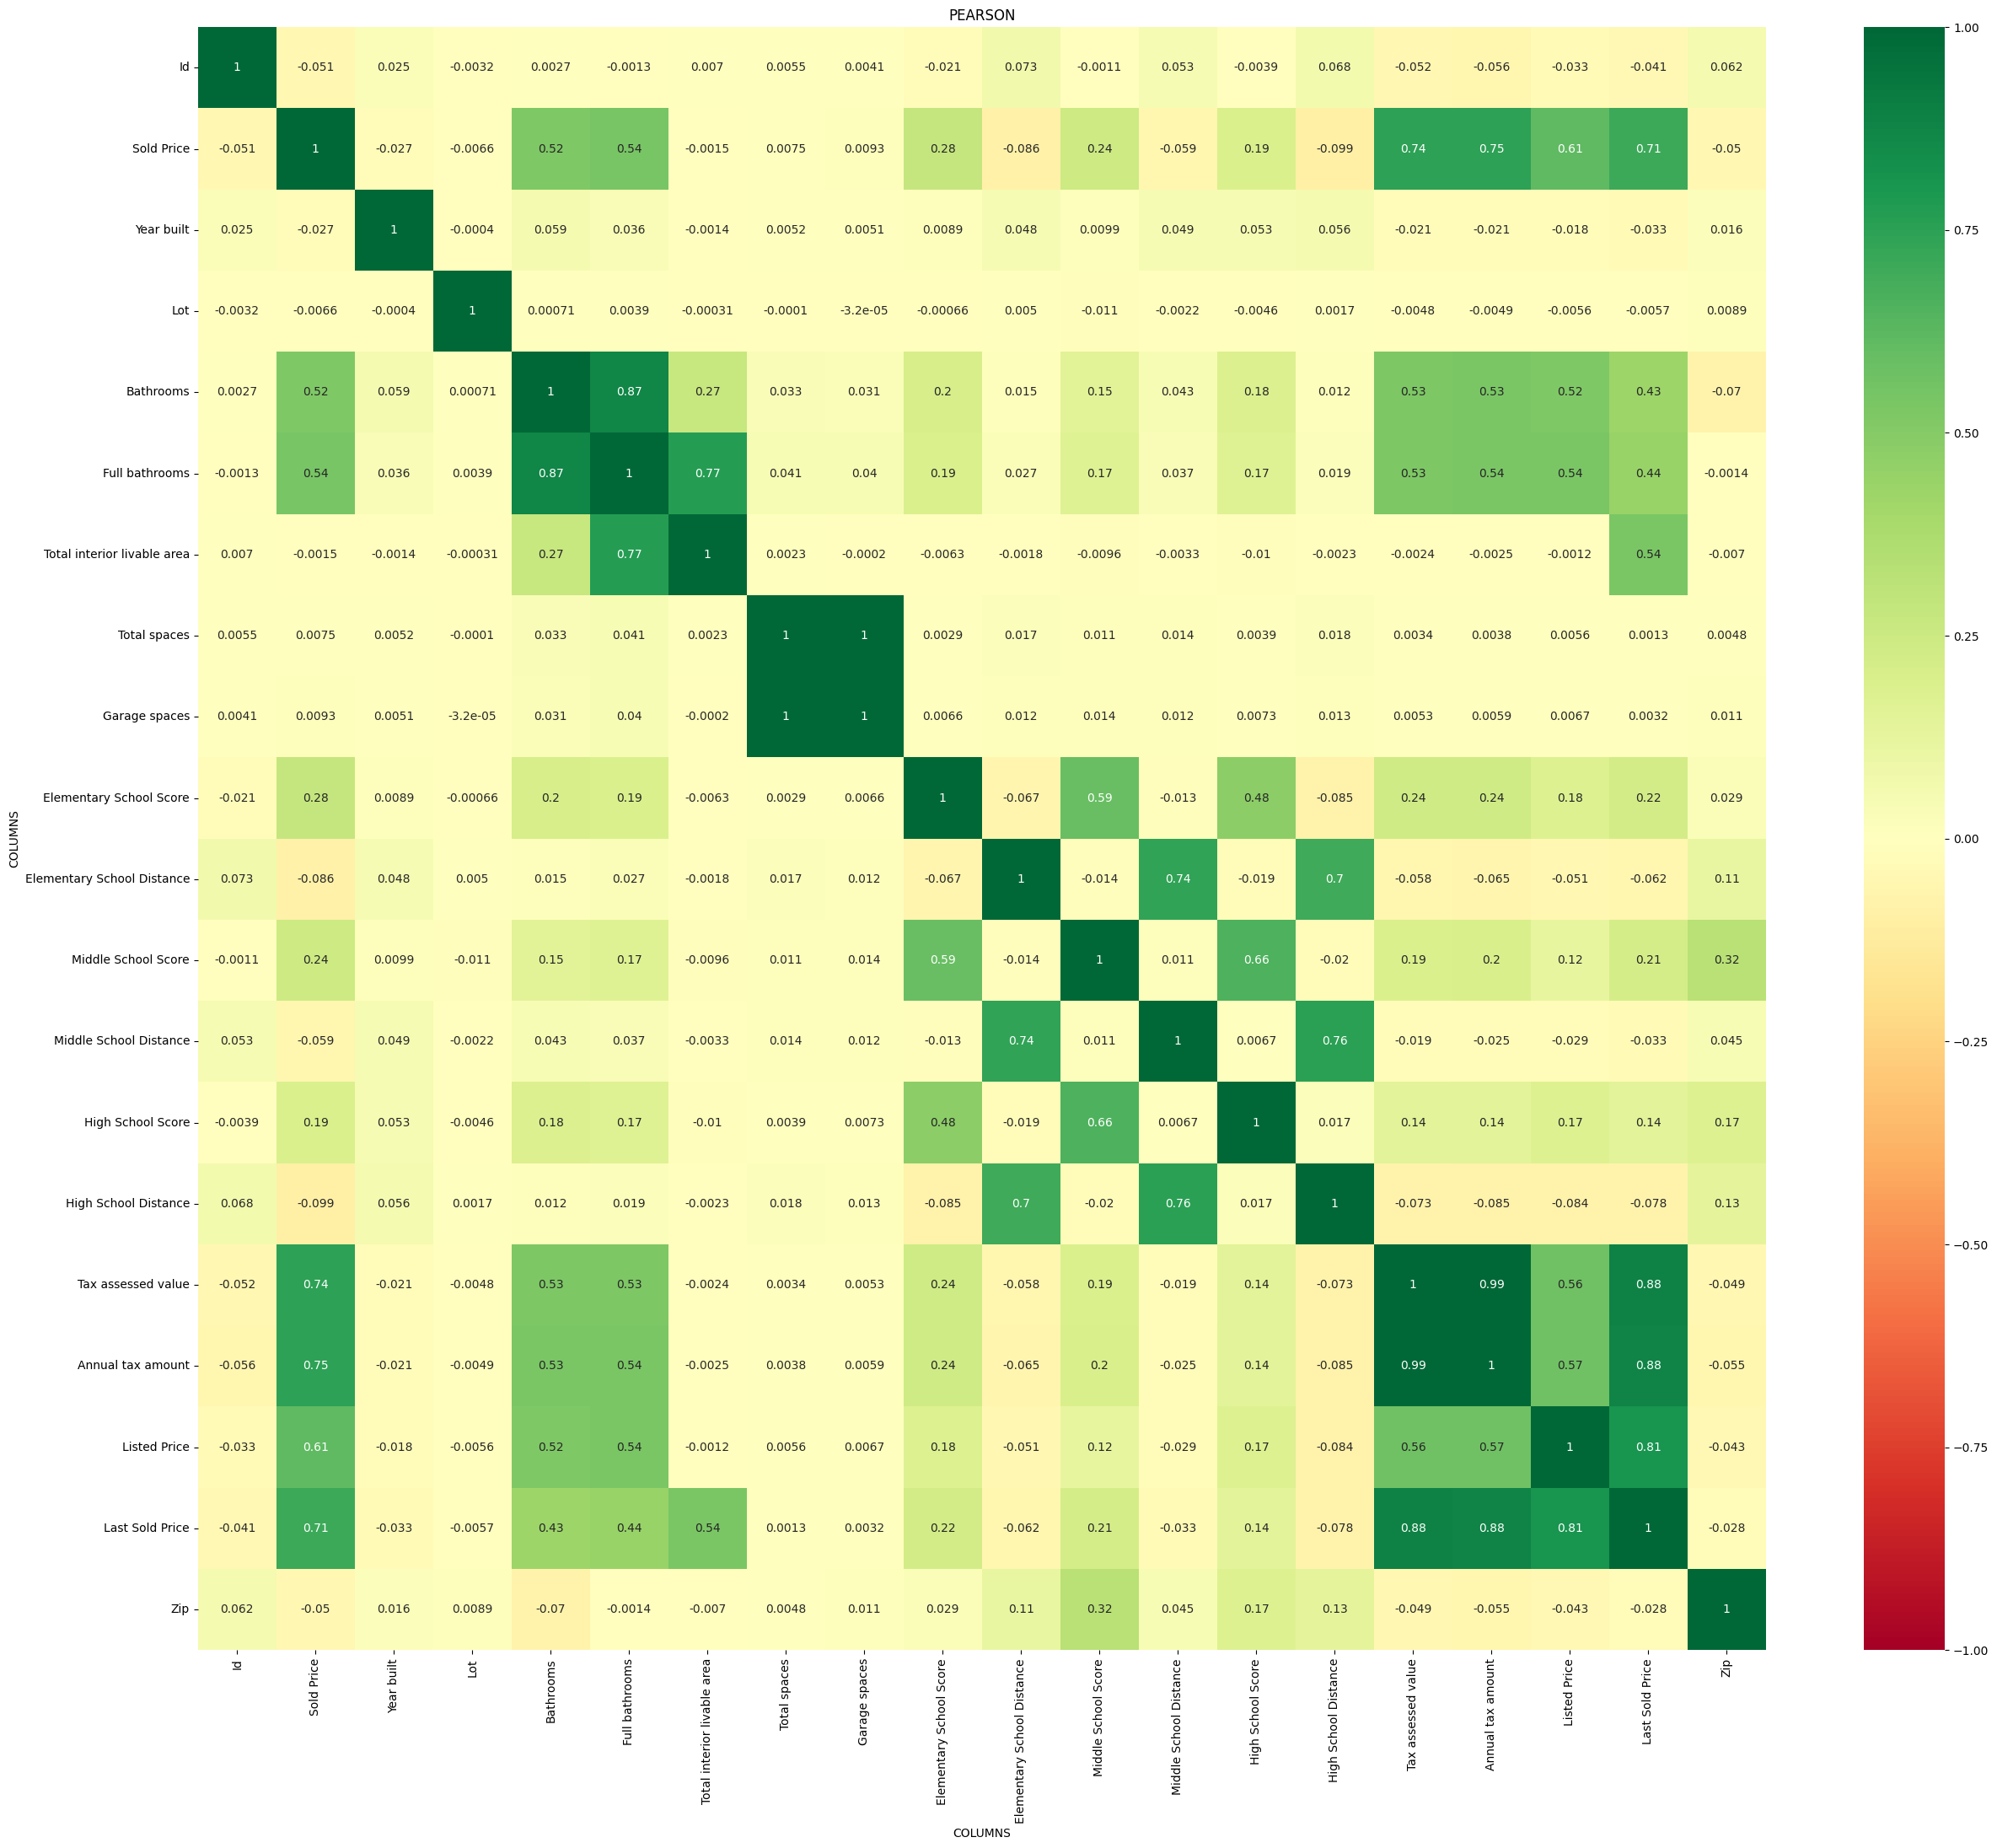

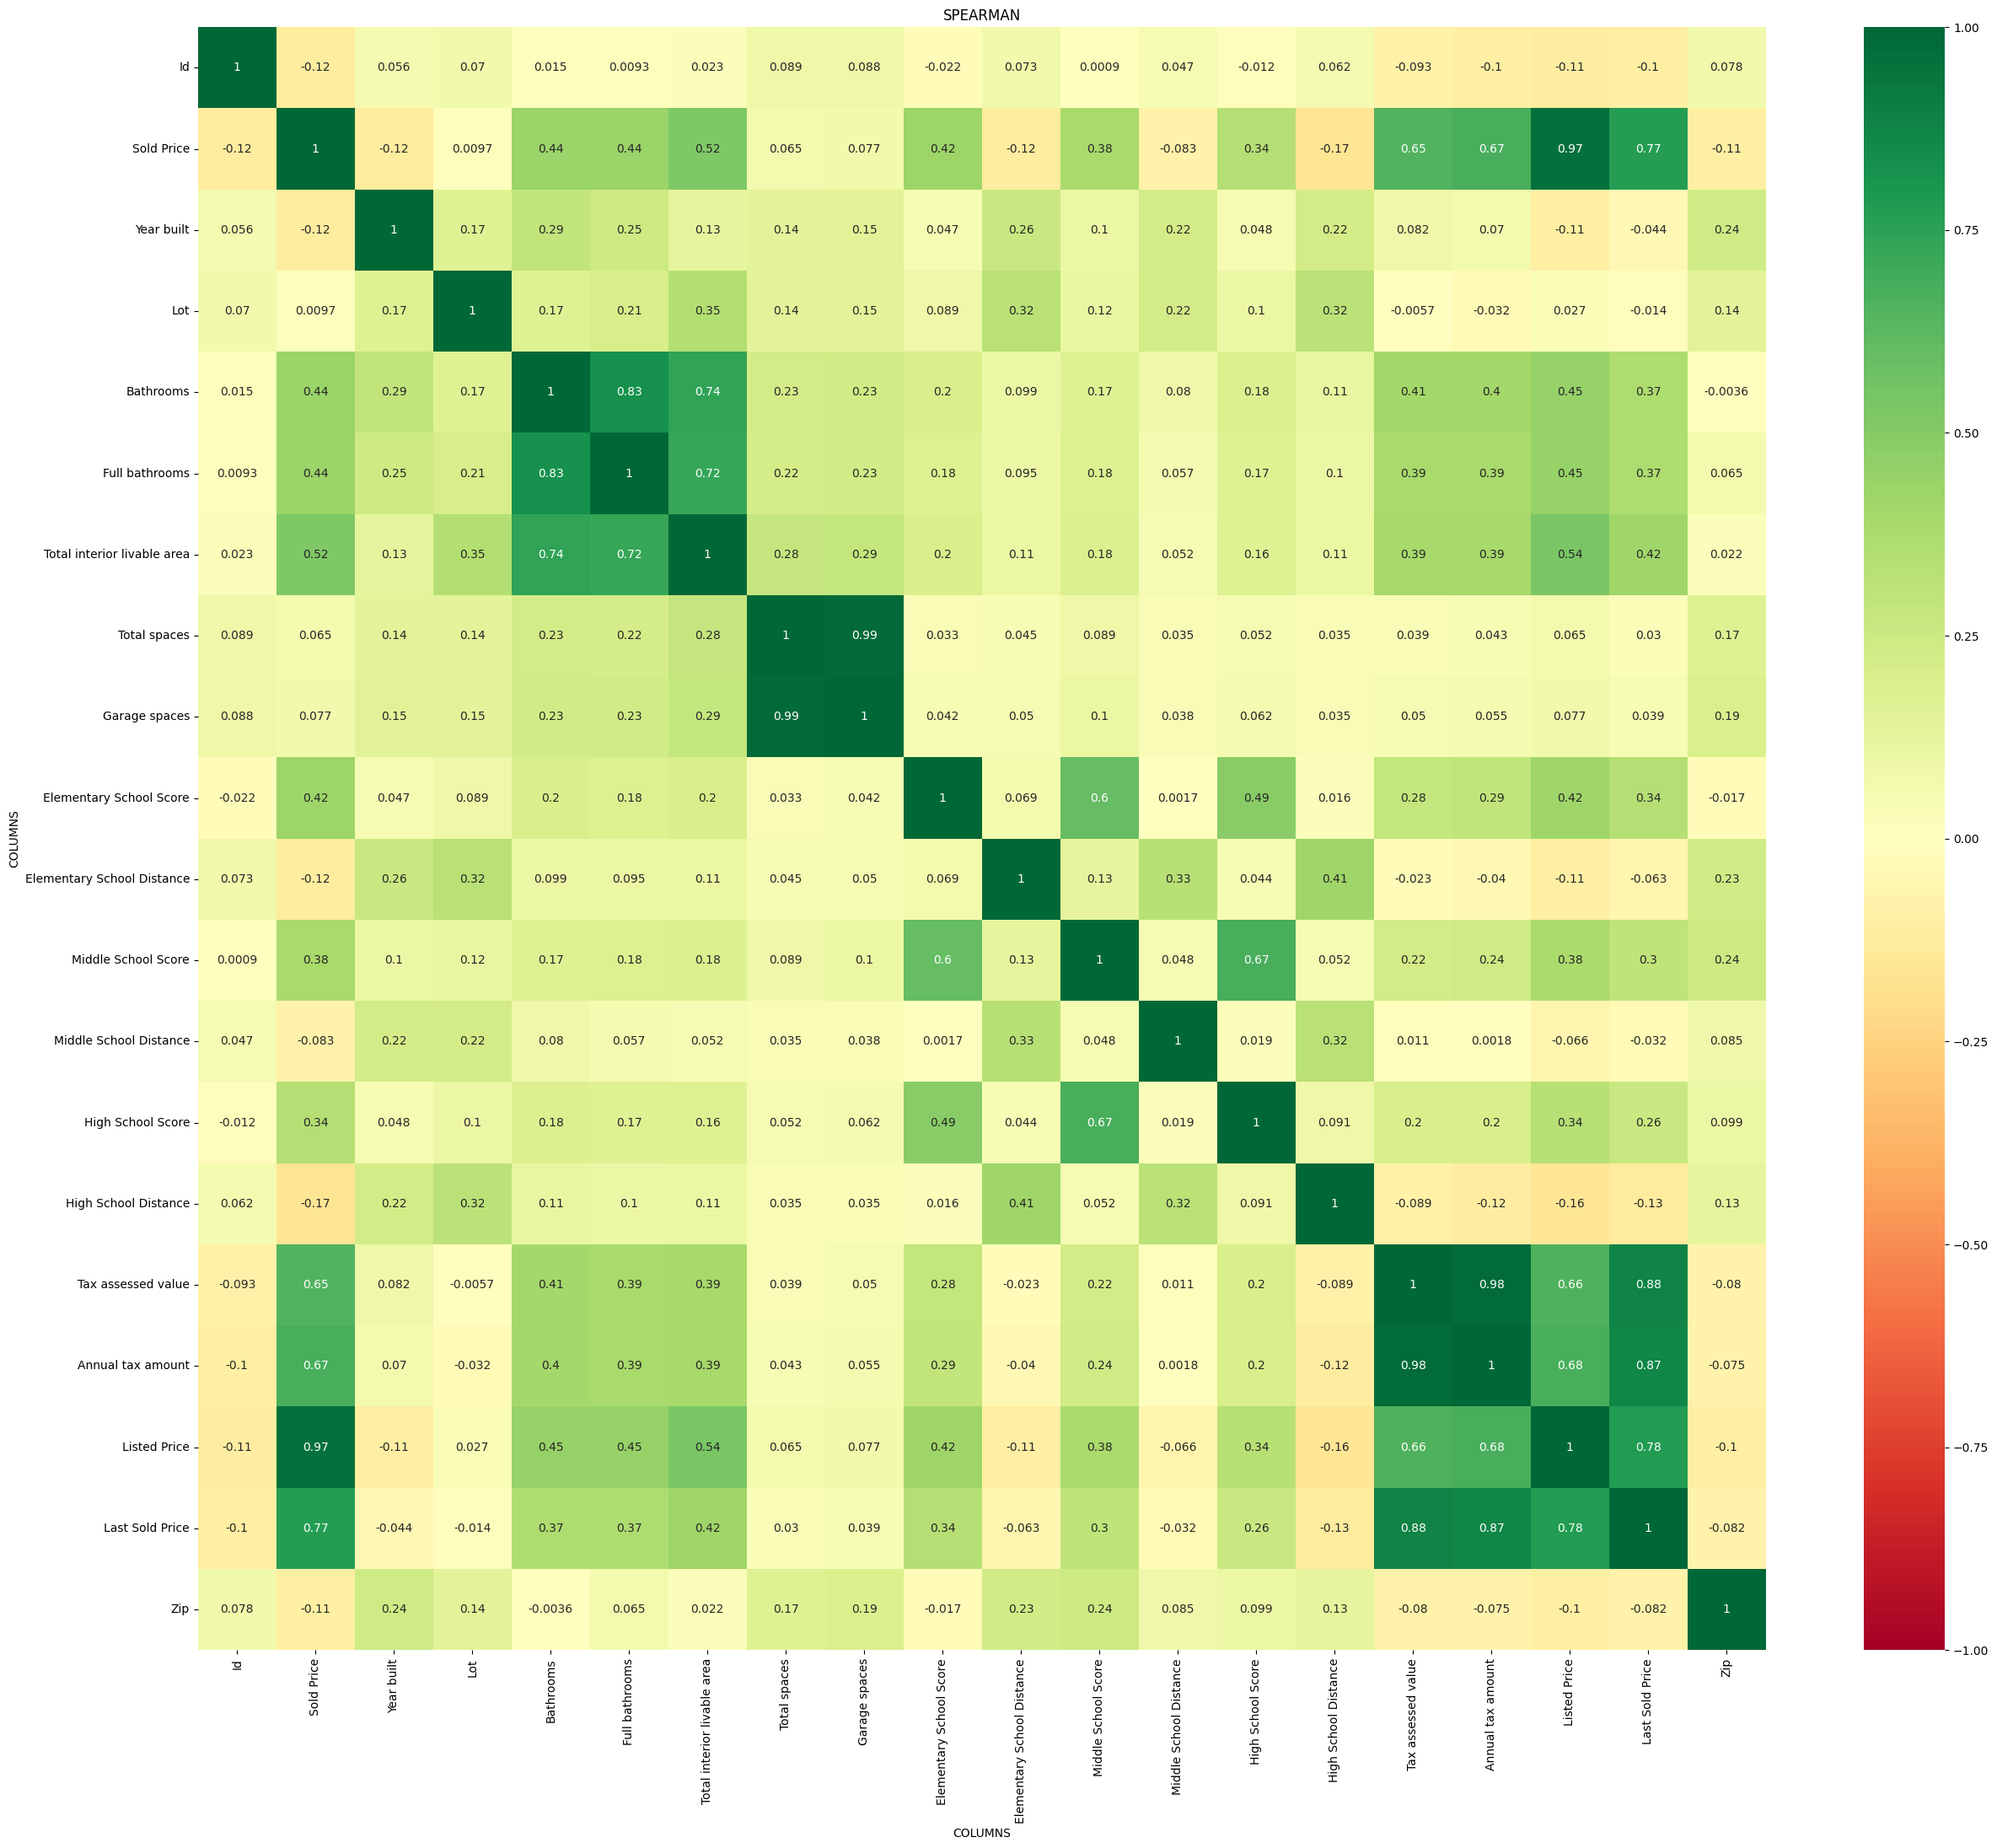

In [15]:
corrPearson = train_data.corr(method="pearson")    # 两种相关系数定义方法
corrSpearman = train_data.corr(method="spearman")

figure = plt.figure(figsize=(30,25))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")

figure = plt.figure(figsize=(30,25))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("SPEARMAN")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.savefig('Spearman_corr.jpg')


- 数字特征相关性结论：

较强正相关性：`['Bathrooms', 'Full bathrooms', 'Tax assessed value', 'Annual tax amount', 'Listed Price', 'Last Sold Price']`

较强负相关性：`['Elementary School Distance','Middle School Distance', 'High School Distance']`

## 异常值处理